## Imports

In [1]:
import pandas as pd
import TumorDecon as td
from scipy.stats import wilcoxon
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
from scipy import stats
from sklearn.tree import _tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Formatting Data

In [2]:
uvm_expression = pd.read_excel('C:/Users/NathanGrant/Programs/TripodsREU/data/uvm_tcga_pan_can_atlas_2018/data_RNA_Seq_v2_expression_median_excel.xlsx',index_col="Hugo_Symbol")
uvm_expression.index

Index(['UBE2Q2P2',  'RPL41P2',  'RPS6KA2',    'BRCA1', 'AI894139',   'ERICH5',
          'SSX9P',    'CIITA',    'EZHIP',   'EFCAB8',
       ...
         'ZWILCH',    'ZWINT',     'ZXDA',     'ZXDB',     'ZXDC',   'ZYG11A',
         'ZYG11B',      'ZYX',    'ZZEF1',     'ZZZ3'],
      dtype='object', name='Hugo_Symbol', length=20529)

In [3]:
uvm_expression = td.df_normalization(uvm_expression.T, "minmax")
#del uvm_expression["DESCRIPTION"]
#uvm_expression.insert(0,"DESCRIPTION","na")
uvm_expression.head()

Hugo_Symbol,UBE2Q2P2,RPL41P2,RPS6KA2,BRCA1,AI894139,ERICH5,SSX9P,CIITA,EZHIP,EFCAB8,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-RZ-AB0B-01,0.442079,0.796904,0.399113,0.0,0.331606,0.219769,0.186285,0.0,0.000000,0.000000,...,0.716851,0.552608,0.618607,0.410517,0.216020,0.090292,0.511827,0.161684,0.585549,0.306053
TCGA-V3-A9ZX-01,0.198754,0.799145,0.319529,0.0,0.175706,0.000000,0.000000,0.0,0.000000,0.201686,...,0.594975,0.804777,0.227171,0.277436,0.191290,0.000000,0.807311,0.070870,0.502416,0.429435
TCGA-V3-A9ZY-01,0.066856,0.196325,0.129218,0.0,0.156197,0.000000,0.000000,0.0,0.254387,0.000000,...,0.377242,0.333014,0.327030,0.195518,0.512077,0.645250,0.169385,0.352667,0.537181,0.165353
TCGA-V4-A9E5-01,0.238791,0.113941,0.245919,0.0,0.026320,0.000000,0.000000,0.0,0.000000,0.000000,...,0.083219,0.374607,0.270566,0.109298,0.371692,0.000000,0.182572,0.679224,0.651534,0.144678
TCGA-V4-A9E7-01,0.435979,0.447497,0.667467,0.0,0.156154,0.256046,0.000000,0.0,0.000000,0.219024,...,0.557109,0.631245,0.247666,0.286749,0.095868,0.000000,0.145500,0.217483,0.491986,0.117278


In [4]:
uvm_expression.T.to_excel("C:/Users/NathanGrant/Programs/TripodsREU/data/GSEAExpression.xlsx")


In [5]:
patient_ids = list(uvm_expression.index)

In [6]:
presence_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/uvm_tcga_pan_can_atlas_2018/data_CNA.txt',delimiter='\t', index_col="Hugo_Symbol")
presence_df.head()

,Entrez_Gene_Id,Cytoband,TCGA-RZ-AB0B-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZY-01,TCGA-V4-A9E5-01,TCGA-V4-A9E7-01,TCGA-V4-A9E8-01,TCGA-V4-A9E9-01,TCGA-V4-A9EA-01,...,TCGA-WC-A885-01,TCGA-WC-A888-01,TCGA-WC-A88A-01,TCGA-WC-AA9A-01,TCGA-WC-AA9E-01,TCGA-YZ-A980-01,TCGA-YZ-A982-01,TCGA-YZ-A983-01,TCGA-YZ-A984-01,TCGA-YZ-A985-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,116983.0,1p36.33,-1,0,0,0,-2,-1,0,0,...,0,0,0,-1,-1,0,-1,0,0,0
ACTRT2,140625.0,1p36.32,-1,0,0,0,-2,-1,0,0,...,0,0,0,-1,-1,0,-1,0,0,0
AGRN,375790.0,1p36.33,-1,0,0,0,-2,-1,0,0,...,0,0,0,-1,-1,0,-1,0,0,0
ANKRD65,441869.0,1p36.33,-1,0,0,0,-2,-1,0,0,...,0,0,0,-1,-1,0,-1,0,0,0
ATAD3A,55210.0,1p36.33,-1,0,0,0,-2,-1,0,0,...,0,0,0,-1,-1,0,-1,0,0,0


In [7]:
num, pat = presence_df.loc[["BAP1"]].values[0,2:],presence_df.columns.values[2:]

In [8]:
l = [(num[i],pat[i]) for i in range(len(pat))]

In [9]:
l3 = sorted(l, key=lambda l: l[0])

In [10]:
l2 = [l[i][1] for i in range(len(l))]

In [11]:
#l2.insert(0,"DESCRIPTION")

In [12]:
print(l2)
uvm_expression.columns

['TCGA-RZ-AB0B-01', 'TCGA-V3-A9ZX-01', 'TCGA-V3-A9ZY-01', 'TCGA-V4-A9E5-01', 'TCGA-V4-A9E7-01', 'TCGA-V4-A9E8-01', 'TCGA-V4-A9E9-01', 'TCGA-V4-A9EA-01', 'TCGA-V4-A9EC-01', 'TCGA-V4-A9ED-01', 'TCGA-V4-A9EE-01', 'TCGA-V4-A9EF-01', 'TCGA-V4-A9EH-01', 'TCGA-V4-A9EI-01', 'TCGA-V4-A9EJ-01', 'TCGA-V4-A9EK-01', 'TCGA-V4-A9EL-01', 'TCGA-V4-A9EM-01', 'TCGA-V4-A9EO-01', 'TCGA-V4-A9EQ-01', 'TCGA-V4-A9ES-01', 'TCGA-V4-A9ET-01', 'TCGA-V4-A9EU-01', 'TCGA-V4-A9EV-01', 'TCGA-V4-A9EW-01', 'TCGA-V4-A9EX-01', 'TCGA-V4-A9EY-01', 'TCGA-V4-A9EZ-01', 'TCGA-V4-A9F0-01', 'TCGA-V4-A9F1-01', 'TCGA-V4-A9F2-01', 'TCGA-V4-A9F3-01', 'TCGA-V4-A9F4-01', 'TCGA-V4-A9F5-01', 'TCGA-V4-A9F7-01', 'TCGA-V4-A9F8-01', 'TCGA-VD-A8K7-01', 'TCGA-VD-A8K8-01', 'TCGA-VD-A8K9-01', 'TCGA-VD-A8KA-01', 'TCGA-VD-A8KB-01', 'TCGA-VD-A8KD-01', 'TCGA-VD-A8KE-01', 'TCGA-VD-A8KF-01', 'TCGA-VD-A8KG-01', 'TCGA-VD-A8KH-01', 'TCGA-VD-A8KI-01', 'TCGA-VD-A8KJ-01', 'TCGA-VD-A8KK-01', 'TCGA-VD-A8KL-01', 'TCGA-VD-A8KM-01', 'TCGA-VD-A8KN-01', 'TCGA-VD-A8

Index(['UBE2Q2P2',  'RPL41P2',  'RPS6KA2',    'BRCA1', 'AI894139',   'ERICH5',
          'SSX9P',    'CIITA',    'EZHIP',   'EFCAB8',
       ...
         'ZWILCH',    'ZWINT',     'ZXDA',     'ZXDB',     'ZXDC',   'ZYG11A',
         'ZYG11B',      'ZYX',    'ZZEF1',     'ZZZ3'],
      dtype='object', name='Hugo_Symbol', length=20529)

In [13]:
u_temp = uvm_expression.T[l2]
u_temp.head()

,TCGA-RZ-AB0B-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZY-01,TCGA-V4-A9E5-01,TCGA-V4-A9E7-01,TCGA-V4-A9E8-01,TCGA-V4-A9E9-01,TCGA-V4-A9EA-01,TCGA-V4-A9EC-01,TCGA-V4-A9ED-01,...,TCGA-WC-A885-01,TCGA-WC-A888-01,TCGA-WC-A88A-01,TCGA-WC-AA9A-01,TCGA-WC-AA9E-01,TCGA-YZ-A980-01,TCGA-YZ-A982-01,TCGA-YZ-A983-01,TCGA-YZ-A984-01,TCGA-YZ-A985-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,0.442079,0.198754,0.066856,0.238791,0.435979,0.181113,0.399689,0.414463,0.000000,0.260536,...,0.391134,0.488326,0.227854,0.903494,0.423284,0.712663,0.000000,1.000000,0.084992,0.311701
RPL41P2,0.796904,0.799145,0.196325,0.113941,0.447497,0.248481,0.226878,0.000000,0.356716,0.361537,...,0.295647,0.658855,0.595608,0.795746,0.750659,0.485396,0.298089,0.488094,0.218404,0.207915
RPS6KA2,0.399113,0.319529,0.129218,0.245919,0.667467,0.501978,0.328036,0.061603,0.473926,0.370320,...,0.231609,0.515797,0.403594,0.791260,0.388260,0.263015,0.168682,0.193420,0.267371,0.127013
BRCA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AI894139,0.331606,0.175706,0.156197,0.026320,0.156154,0.101752,0.000000,0.071703,0.081963,0.069925,...,0.030527,0.207712,0.076655,0.312134,0.370614,0.330747,0.072931,0.350672,0.026584,0.054880


In [14]:
u_temp.to_excel("C:/Users/NathanGrant/Programs/TripodsREU/data/GSEAExpression.xlsx")

In [15]:
s =""
for i in range(len(l3)):
    s += str(l3[i][0]) + " "
print(s)

-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


In [16]:
results_df = pd.read_excel("C:/Users/NathanGrant/Programs/TripodsREU/data/CibersortResults/UVMRun1/CIBERSORTOutput_Job2.xlsx",index_col="Input Sample")
results_df.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE
Input Sample,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,0.000000,0.000000,0.043900,0.000000,0.0,0.182354,0.0,0.034866,0.099392,0.0,...,0.068259,0.003922,0.0,0.268964,0,0.0,0,0.73,-0.005400,1.099710
TCGA-V3-A9ZX-01,0.000800,0.002109,0.003043,0.261506,0.0,0.000000,0.0,0.095574,0.003347,0.0,...,0.231561,0.013261,0.0,0.207099,0,0.0,0,0.54,0.019062,1.094536
TCGA-V3-A9ZY-01,0.102940,0.000000,0.075362,0.108698,0.0,0.043593,0.0,0.012877,0.073627,0.0,...,0.478309,0.000000,0.0,0.036752,0,0.0,0,0.41,0.038757,1.077862
TCGA-V4-A9E5-01,0.012469,0.000000,0.003132,0.000000,0.0,0.138271,0.0,0.008064,0.062064,0.0,...,0.264959,0.004574,0.0,0.268041,0,0.0,0,0.12,0.084018,1.067924
TCGA-V4-A9E7-01,0.046416,0.000000,0.201083,0.084126,0.0,0.000000,0.0,0.038514,0.000000,0.0,...,0.469406,0.000000,0.0,0.072276,0,0.0,0,0.29,0.050437,1.066579


In [17]:
def return_subgroups(gene, p, r):
    subgroups = {}
    patients = p.columns[2:]
    val = p.loc[[gene]].values[0,2:]
    for i in range(len(val)):
        if val[i] in subgroups:
            subgroups[val[i]].append((i,patients[i],val[i]))
        else:
            subgroups[val[i]] = [(i,patients[i],val[i])]
    return subgroups
subgroups = return_subgroups("BAP1", presence_df,results_df)

In [18]:
group_1_df = results_df.loc[[t[1] for t in subgroups[-1]]]
group_2_df = results_df.loc[[t[1] for t in subgroups[0]]]
group_1_df = group_1_df[group_1_df.columns.difference(['RMSE','P-value','Pearson Correlation'])]
group_2_df = group_2_df[group_2_df.columns.difference(['RMSE','P-value','Pearson Correlation'])]

In [19]:
group_1_df = td.combine_celltypes(group_1_df)
group_2_df = td.combine_celltypes(group_2_df)

In [20]:
group_1_df.head()

,Eosinophils,Monocytes,Neutrophils,Plasma cells,CD8 T cells,T cells gamma delta,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
Input Sample,,,,,,,,,,,,
TCGA-RZ-AB0B-01,0.000000,0.000000,0.0,0.043900,0.000000,0.0,0.000000,0.316612,0.145675,0.220927,0.268964,0.003922
TCGA-V3-A9ZX-01,0.000000,0.016613,0.0,0.003043,0.261499,0.0,0.002908,0.098918,0.024691,0.371974,0.207093,0.013260
TCGA-V4-A9E7-01,0.000000,0.012710,0.0,0.201085,0.084127,0.0,0.046417,0.038515,0.074656,0.470213,0.072277,0.000000
TCGA-V4-A9E8-01,0.000000,0.000000,0.0,0.010409,0.158923,0.0,0.027330,0.094339,0.063354,0.639808,0.005837,0.000000
TCGA-V4-A9ED-01,0.002146,0.023242,0.0,0.002478,0.000000,0.0,0.001451,0.222338,0.049396,0.421859,0.273799,0.003291


In [21]:
def visualize_immune_diff(celltype, df1,df2):
    val1 = df1[celltype].values
    val2 = df2[celltype].values
    sns.kdeplot(val1,shade=True,color="b",label="-1")
    sns.kdeplot(val2,shade=True,color="r",label="0")
    print(mannwhitneyu(val1,val2))
    return mannwhitneyu(val1,val2)

## BAP1 immune tests

MannwhitneyuResult(statistic=631.0, pvalue=0.05311337810599395)


MannwhitneyuResult(statistic=631.0, pvalue=0.05311337810599395)

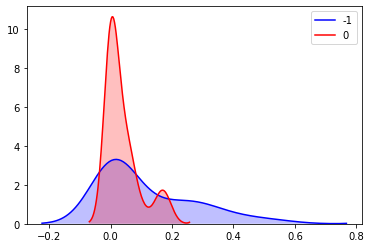

In [22]:
visualize_immune_diff("CD8 T cells",group_1_df,group_2_df)

MannwhitneyuResult(statistic=449.0, pvalue=0.00046261108689871016)


MannwhitneyuResult(statistic=449.0, pvalue=0.00046261108689871016)

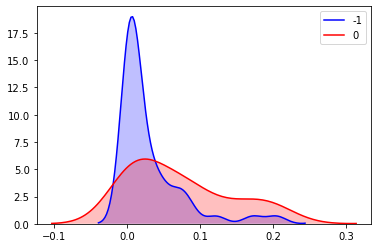

In [23]:
visualize_immune_diff("B cells",group_1_df,group_2_df)

MannwhitneyuResult(statistic=512.0, pvalue=0.002921387528861221)


MannwhitneyuResult(statistic=512.0, pvalue=0.002921387528861221)

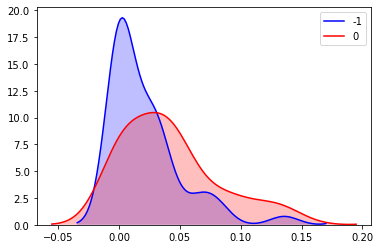

In [24]:
visualize_immune_diff("Monocytes",group_1_df,group_2_df)

MannwhitneyuResult(statistic=639.0, pvalue=0.04332682007300334)


MannwhitneyuResult(statistic=639.0, pvalue=0.04332682007300334)

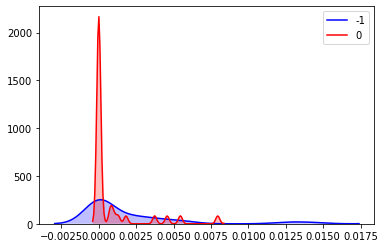

In [25]:
visualize_immune_diff("DC",group_1_df,group_2_df)

## PTPN23 Immune tests

In [222]:
p_subgroups = return_subgroups("ATG14", presence_df,results_df)

In [223]:
p_group_1_df = results_df.loc[[t[1] for t in p_subgroups[1]]]
p_group_0_df = results_df.loc[[t[1] for t in p_subgroups[0]]]
p_group_1_df = p_group_1_df[p_group_1_df.columns.difference(['RMSE','P-value','Pearson Correlation'])]
p_group_0_df = p_group_0_df[p_group_0_df.columns.difference(['RMSE','P-value','Pearson Correlation'])]
p_group_1_df = td.combine_celltypes(p_group_1_df)
p_group_0_df = td.combine_celltypes(p_group_0_df)
p_group_0_df.columns

Index(['Eosinophils', 'Monocytes', 'Neutrophils', 'Plasma cells',
       'CD8 T cells', 'T cells gamma delta', 'B cells', 'CD4 T cells',
       'NK cells', 'Macrophages', 'Mast cells', 'DC'],
      dtype='object')

MannwhitneyuResult(statistic=63.0, pvalue=0.09309731280045985)


MannwhitneyuResult(statistic=63.0, pvalue=0.09309731280045985)

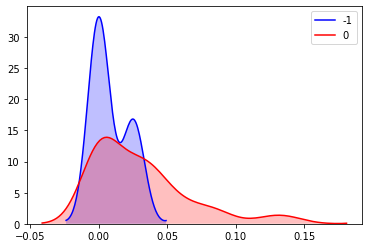

In [224]:
visualize_immune_diff("Monocytes",p_group_1_df,p_group_0_df)

MannwhitneyuResult(statistic=111.0, pvalue=0.47443044709396975)


MannwhitneyuResult(statistic=111.0, pvalue=0.47443044709396975)

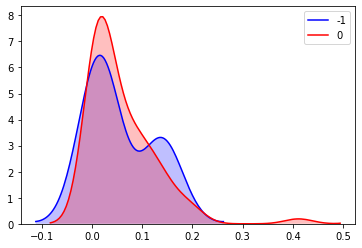

In [225]:
visualize_immune_diff("Plasma cells",p_group_1_df,p_group_0_df)

MannwhitneyuResult(statistic=78.5, pvalue=0.17469394094576846)


MannwhitneyuResult(statistic=78.5, pvalue=0.17469394094576846)

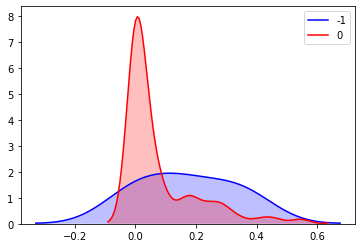

In [226]:
visualize_immune_diff("CD8 T cells",p_group_1_df,p_group_0_df)

MannwhitneyuResult(statistic=47.5, pvalue=0.045239671108862775)


MannwhitneyuResult(statistic=47.5, pvalue=0.045239671108862775)

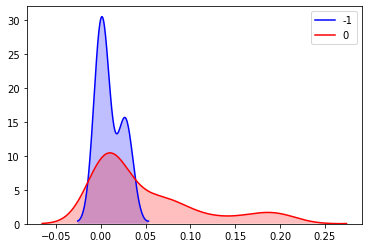

In [227]:
visualize_immune_diff("B cells",p_group_1_df,p_group_0_df)

Eosinophils
MannwhitneyuResult(statistic=103.0, pvalue=0.35695636919383456)
Monocytes
MannwhitneyuResult(statistic=63.0, pvalue=0.09309731280045985)
Neutrophils
Plasma cells
MannwhitneyuResult(statistic=111.0, pvalue=0.47443044709396975)
CD8 T cells
MannwhitneyuResult(statistic=78.5, pvalue=0.17469394094576846)
T cells gamma delta
MannwhitneyuResult(statistic=108.0, pvalue=0.35520583378287196)
B cells
MannwhitneyuResult(statistic=47.5, pvalue=0.045239671108862775)
CD4 T cells
MannwhitneyuResult(statistic=72.0, pvalue=0.14356187163414658)
NK cells
MannwhitneyuResult(statistic=113.0, pvalue=0.49488381345393423)
Macrophages


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


MannwhitneyuResult(statistic=98.0, pvalue=0.3454748381286329)
Mast cells
MannwhitneyuResult(statistic=85.0, pvalue=0.2323594750767869)
DC
MannwhitneyuResult(statistic=70.5, pvalue=0.10088844100982824)


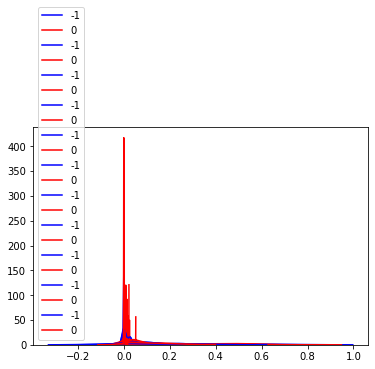

In [228]:
bap_manw = []
for cell in group_1_df.columns:
    print(cell)
    if cell != "Neutrophils":
        bap_manw.append((cell,visualize_immune_diff(cell,p_group_1_df,p_group_0_df)[1]))

In [71]:
patient_data = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/uvm_tcga_pan_can_atlas_2018/data_clinical_patient.txt',delimiter="\t",index_col="PATIENT_ID")

In [72]:
patient_data.head()

,SUBTYPE,CANCER_TYPE_ACRONYM,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,PFS_STATUS,PFS_MONTHS
PATIENT_ID,,,,,,,,,,
TCGA-V4-A9F8,UVM,UVM,Institut Curie,Yes,LIVING,19.627182,ALIVE OR DEAD TUMOR FREE,19.627182,CENSORED,19.627182
TCGA-V4-A9EQ,UVM,UVM,Institut Curie,Yes,DECEASED,14.958740,DEAD WITH TUMOR,14.958740,PROGRESSION,8.284841
TCGA-V4-A9EE,UVM,UVM,Institut Curie,Yes,DECEASED,13.084788,DEAD WITH TUMOR,13.084788,PROGRESSION,6.936910
TCGA-V3-A9ZY,UVM,UVM,Cleveland Clinic Foundation,Yes,LIVING,15.090246,ALIVE OR DEAD TUMOR FREE,15.090246,CENSORED,15.090246
TCGA-V4-A9EU,UVM,UVM,Institut Curie,Yes,LIVING,23.309334,ALIVE OR DEAD TUMOR FREE,23.309334,PROGRESSION,2.827366


## Check distributions for overall survival for people of both groups for BAP1

In [187]:
patient_dict = {}
for p in list(patient_data.index):
    patient_dict[str(p)+"-01"] = (presence_df.loc["POLK",str(p)+"-01"],patient_data.loc[p,"DSS_MONTHS"])

In [188]:
zero_group = [patient_dict[p][1] for p in list(patient_dict.keys()) if patient_dict[p][0] == 0]
neg1_group = [patient_dict[p][1] for p in list(patient_dict.keys()) if patient_dict[p][0] == 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x205e4675e48>,
 'caps': [<matplotlib.lines.Line2D at 0x205e4604808>,
 'boxes': [<matplotlib.lines.Line2D at 0x205e4655088>,
 'medians': [<matplotlib.lines.Line2D at 0x205e460f8c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x205e44bed48>,
 'means': []}

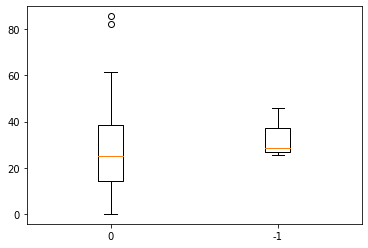

In [189]:
plt.boxplot([zero_group,neg1_group],labels=[0,-1])

In [190]:
mannwhitneyu(zero_group,neg1_group)

MannwhitneyuResult(statistic=75.0, pvalue=0.17501262467298823)

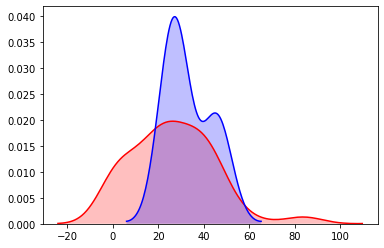

In [191]:
sns.kdeplot(zero_group,shade=True,color="r")
sns.kdeplot(neg1_group,shade=True,color='b')

## Check distributions for overall survival for people of both groups for PTPN23

In [253]:
patient_dict_2 = {}
for p in list(patient_data.index):
    patient_dict_2[str(p)+"-01"] = (presence_df.loc["BCL3",str(p)+"-01"],patient_data.loc[p,"DSS_MONTHS"])

In [254]:
zero_group_2 = [patient_dict_2[p][1] for p in list(patient_dict_2.keys()) if patient_dict_2[p][0] == 0]
neg1_group_2 = [patient_dict_2[p][1] for p in list(patient_dict_2.keys()) if patient_dict_2[p][0] == 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x205e4e0a808>,
 'caps': [<matplotlib.lines.Line2D at 0x205e4e0aec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x205e4e02f88>,
 'medians': [<matplotlib.lines.Line2D at 0x205e4e0fe88>,
 'fliers': [<matplotlib.lines.Line2D at 0x205e4e0ffc8>,
 'means': []}

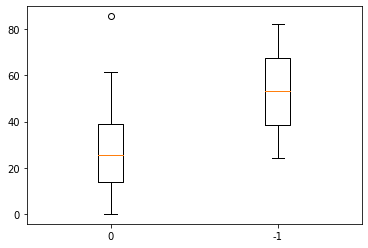

In [255]:
plt.boxplot([zero_group_2,neg1_group_2],labels=[0,-1])

In [256]:
mannwhitneyu(zero_group_2,neg1_group_2)

MannwhitneyuResult(statistic=41.0, pvalue=0.14166569286666414)

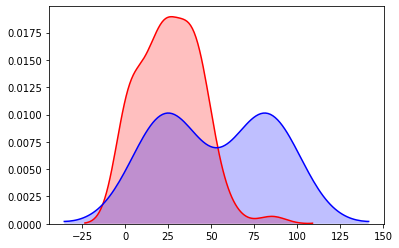

In [257]:
sns.kdeplot(zero_group_2,shade=True,color="r")
sns.kdeplot(neg1_group_2,shade=True,color='b')

## Survival of BAP1 gene groups

In [269]:
patient_dict_3 = {}
for p in list(patient_data.index):
    if patient_data.loc[p,"OS_STATUS"] == "LIVING":
        patient_dict_3[p+"-01"] = (presence_df.loc["MLIP",p+"-01"],1)
    else:
        patient_dict_3[p+"-01"] = (presence_df.loc["MLIP",p+"-01"],0)

In [274]:
from statsmodels.stats.proportion import proportions_ztest
zero_group = [patient_dict_3[p][1] for p in list(patient_dict_3.keys()) if patient_dict_3[p][0] == 0]
neg1_group = [patient_dict_3[p][1] for p in list(patient_dict_3.keys()) if patient_dict_3[p][0] == 1]

In [275]:
suc_zero = sum([1 for o in zero_group if o == 1])
suc_neg = sum([1 for o in neg1_group if o == 1])

In [276]:
print(proportions_ztest([suc_zero,suc_neg],[len(zero_group),len(neg1_group)]))

(-0.44944957380803413, 0.6531073766787725)


In [277]:
t = ["0","1"]
v = [[suc_zero/len(zero_group),suc_neg/len(neg1_group)],[(len(zero_group)-suc_zero)/len(zero_group),(len(neg1_group)-suc_neg)/len(neg1_group)]]

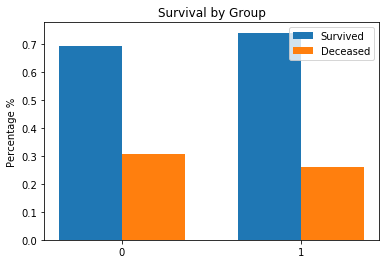

In [278]:
N = 2
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind + width, v[1], width,
    label='Deceased')

plt.ylabel('Percentage %')
plt.title('Survival by Group')

plt.xticks(ind + width / 2, ('0', '1'))
plt.legend(loc='best')
plt.show()

In [235]:
patient_dict_3

{'TCGA-V4-A9F8-01': (0, 1),
 'TCGA-V4-A9EQ-01': (0, 0),
 'TCGA-V4-A9EE-01': (0, 0),
 'TCGA-V3-A9ZY-01': (0, 1),
 'TCGA-V4-A9EU-01': (0, 1),
 'TCGA-YZ-A983-01': (0, 1),
 'TCGA-WC-A87U-01': (0, 0),
 'TCGA-V4-A9F7-01': (0, 1),
 'TCGA-WC-A884-01': (0, 1),
 'TCGA-VD-AA8O-01': (0, 0),
 'TCGA-VD-A8KO-01': (0, 1),
 'TCGA-V4-A9EJ-01': (0, 1),
 'TCGA-VD-A8KK-01': (0, 1),
 'TCGA-VD-A8KE-01': (0, 1),
 'TCGA-VD-AA8T-01': (0, 1),
 'TCGA-V4-A9ED-01': (0, 1),
 'TCGA-V4-A9ET-01': (0, 1),
 'TCGA-VD-A8KL-01': (0, 1),
 'TCGA-V4-A9EX-01': (0, 0),
 'TCGA-WC-A87T-01': (0, 1),
 'TCGA-VD-AA8R-01': (0, 1),
 'TCGA-VD-A8K9-01': (0, 1),
 'TCGA-WC-A885-01': (0, 1),
 'TCGA-V4-A9E9-01': (0, 1),
 'TCGA-V4-A9EK-01': (0, 1),
 'TCGA-V4-A9EO-01': (1, 1),
 'TCGA-V4-A9F4-01': (0, 1),
 'TCGA-WC-A88A-01': (0, 0),
 'TCGA-WC-A882-01': (0, 1),
 'TCGA-VD-A8KI-01': (0, 0),
 'TCGA-V4-A9F0-01': (0, 0),
 'TCGA-V4-A9EI-01': (0, 0),
 'TCGA-VD-AA8M-01': (0, 1),
 'TCGA-YZ-A982-01': (-1, 1),
 'TCGA-VD-A8KA-01': (0, 1),
 'TCGA-V3-A9ZX-01':

In [89]:
def calculate_group_sim(group1,group2):
    l1 = [p[1] for p in group1]
    l2 = [p[1] for p in group2]
    sim_score = 0
    l3 = []
    l4 = []
    if len(l1) > len(l2):
        l3 = l1
        l4 = l2
    else:
        l3 = l2
        l4 = l1
    for p in l3:
        if p in l4:
            sim_score +=1
    return sim_score/max(len(l1),len(l2))

In [90]:
calculate_group_sim(subgroups[-1],p_subgroups[-1])

1.0

In [91]:
v[1]

[0.05714285714285714, 0.4772727272727273]

## Check correlation between immune cell frequency by patient and DSS

In [92]:
print(group_1_df['B cells'].idxmax(),group_1_df['B cells'].max())
print(group_1_df['CD8 T cells'].idxmax(),group_1_df['CD8 T cells'].max())


TCGA-YZ-A984-01 0.2042878574756991
TCGA-VD-A8K8-01 0.5443467714888541


In [93]:
group_1_df.loc['TCGA-VD-A8KL-01']

Eosinophils            0.008452
Monocytes              0.000000
Neutrophils            0.000000
Plasma cells           0.000000
CD8 T cells            0.000000
T cells gamma delta    0.000000
B cells                0.038208
CD4 T cells            0.152415
NK cells               0.042774
Macrophages            0.601117
Mast cells             0.142585
DC                     0.014447
Name: TCGA-VD-A8KL-01, dtype: float64

In [94]:
column_maxes = group_1_df.max()
column_mins = group_1_df.min()
bg1_norm = (group_1_df - column_mins) / (column_maxes - column_mins)
bg1_norm.sort_values(by=['Macrophages'], ascending=False)

,Eosinophils,Monocytes,Neutrophils,Plasma cells,CD8 T cells,T cells gamma delta,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
Input Sample,,,,,,,,,,,,
TCGA-WC-A883-01,0.000000,0.000000,NaN,0.071092,0.023380,0.000000,0.033798,0.134087,0.216983,1.000000,0.136540,0.000000
TCGA-V4-A9E8-01,0.000000,0.000000,NaN,0.025294,0.291952,0.000000,0.133780,0.112756,0.329315,0.821069,0.018270,0.000000
TCGA-WC-A882-01,0.600195,0.000000,NaN,0.007119,0.043043,0.000000,0.074324,0.197912,0.133353,0.808952,0.473406,0.000000
TCGA-WC-A88A-01,0.000000,0.000000,NaN,0.033241,0.212145,0.000000,0.361122,0.131143,0.188480,0.805625,0.087648,0.000000
TCGA-VD-A8KL-01,0.377628,0.000000,NaN,0.000000,0.000000,0.000000,0.187033,0.230062,0.222341,0.763872,0.446260,1.000000
TCGA-VD-AA8T-01,0.000000,0.037517,NaN,0.002833,0.094733,0.000000,0.843354,0.260357,0.113214,0.733678,0.000000,0.000000
TCGA-V4-A9EW-01,0.000000,0.242921,NaN,0.049862,0.030694,0.000000,0.215717,0.217158,0.303724,0.727479,0.327917,0.000000
TCGA-V4-A9EE-01,0.000000,0.000000,NaN,0.050957,0.384523,0.000000,0.246492,0.204804,0.032163,0.721363,0.002817,0.000000
TCGA-V4-A9F5-01,0.000000,0.000000,NaN,0.265340,0.000000,0.000000,0.427397,0.174727,0.426932,0.697700,0.125129,0.000000


## Find Other Mutations Possibly Responsible for Increase in Death

### Tree Printing

In [95]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

### Selecting Subgroups

In [96]:
#to_change = patient_data['PATIENT_ID']
#for i in range(len(to_change)):
#    to_change[i] += str("-01")
#patient_data['PATIENT_ID'] = to_change    
#patient_data=patient_data.set_index('PATIENT_ID')
t_group_1_df, t_patient_data = td.keep_common_genes(p_temp_stuff, t_patient_data)

NameError: name 'p_temp_stuff' is not defined

In [97]:
dtc = DecisionTreeClassifier(max_depth=2).fit(t_group_1_df,t_patient_data['OS_STATUS'])

NameError: name 'DecisionTreeClassifier' is not defined

In [98]:
dtc.classes_

NameError: name 'dtc' is not defined

In [99]:
tree_to_code(dtc,[str(a) for a in t_group_1_df.columns])

NameError: name 'dtc' is not defined

In [100]:
patient_dict_4 = {}
for p in list(t_patient_data.index):
    if patient_data.loc[p,"OS_STATUS"] == "LIVING":
        patient_dict_4[p] = (t_group_1_df.loc[p,"HGSNAT"],1)
    else:
        patient_dict_4[p] = (t_group_1_df.loc[p,"HGSNAT"],0)

NameError: name 't_patient_data' is not defined

In [101]:
zero_group = [patient_dict_4[p][1] for p in list(patient_dict_4.keys()) if patient_dict_4[p][0] == 0]
neg1_group = [patient_dict_4[p][1] for p in list(patient_dict_4.keys()) if patient_dict_4[p][0] == -1]
pos1_group = [patient_dict_4[p][1] for p in list(patient_dict_4.keys()) if patient_dict_4[p][0] == 1]
suc_zero = sum([1 for o in zero_group if o == 1])
suc_neg = sum([1 for o in neg1_group if o == 1])
suc_pos = sum([1 for o in pos1_group if o == 1])
t = ["0","-1","1"]
v = [[suc_zero/len(zero_group),suc_neg/len(neg1_group),suc_pos/len(pos1_group)], \
     [(len(zero_group)-suc_zero)/len(zero_group),(len(neg1_group)-suc_neg)/len(neg1_group),(len(pos1_group)-suc_pos)/len(pos1_group)]]
N = 3
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind + width, v[1], width,
    label='Deceased')

plt.ylabel('Percentage %')
plt.title('Survival by Group')

plt.xticks(ind + width / 2, ('0', '-1','1'))
plt.legend(loc='best')
plt.show()

ZeroDivisionError: division by zero

In [64]:
print(proportions_ztest([suc_zero,suc_pos],[len(zero_group),len(pos1_group)]))

(nan, nan)


In [65]:
patient_dict_5 = {}
for p in list(t_group_1_df.index):
    patient_dict_5[p+"-01"] = (presence_df.loc["HGSNAT",p],patient_data.loc[p,"DSS_MONTHS"])
zero_group = [patient_dict_5[p][1] for p in list(patient_dict_5.keys()) if patient_dict_5[p][0] == 0]
neg1_group = [patient_dict_5[p][1] for p in list(patient_dict_5.keys()) if patient_dict_5[p][0] == -1]
pos1_group = [patient_dict_5[p][1] for p in list(patient_dict_5.keys()) if patient_dict_5[p][0] == 1]
plt.boxplot([zero_group,neg1_group,pos1_group],labels=[0,-1,1])

NameError: name 't_group_1_df' is not defined

In [66]:
mannwhitneyu(zero_group,pos1_group)

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [ ]:
sns.kdeplot(zero_group,shade=True,color="r",label="0")
sns.kdeplot(pos1_group,shade=True,color='y',label="1")

In [ ]:
hg_group_0 = results_df.T[[p for p in list(patient_dict_4.keys()) if patient_dict_4[p][0] == 0]].T
hg_group_1 = results_df.T[[p for p in list(patient_dict_4.keys()) if patient_dict_4[p][0] == 1]].T
hg_group_1 = td.combine_celltypes(hg_group_1)
hg_group_0 = td.combine_celltypes(hg_group_0)

In [ ]:
visualize_immune_diff("DC",hg_group_1,hg_group_0)

In [ ]:
hg_group_0.columns

## Correlation between Immune cell frequency and survival cont.

In [102]:
from sklearn.linear_model import LinearRegression
def immune_dss_corr(immune_type,patient_dict,immune_frac):
    x,y = [],[]
    for p in [p for p in list(patient_dict.keys()) if patient_dict[p][0] == -1]:
        x.append(patient_dict[p][1])
        y.append(immune_frac.loc[p,immune_type])
    x = np.asarray(x).reshape(-1,1)
    y = np.asarray(y).reshape(-1,1)
    lin = LinearRegression().fit(x,y)
    return lin.score(x,y)**2,x,y

In [105]:
patient_dict_6 = {}
for p in list(patient_dict_3.keys()):
    if patient_dict_3[p][1] == 1 and patient_dict[p][0] == -1:
        patient_dict_6[p] = (-1,patient_dict[p][1])

Eosinophils :  6.576965888144399e-05


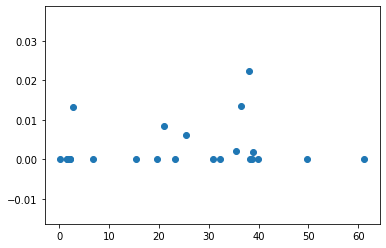

Monocytes :  1.547301837865276e-05


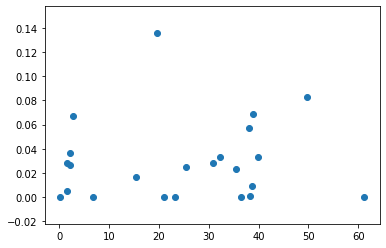

Neutrophils :  1.0


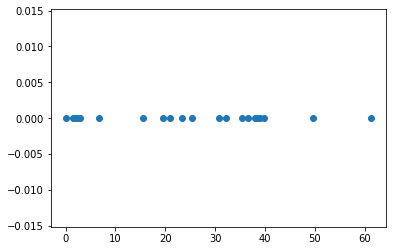

Plasma cells :  6.012819391376965e-06


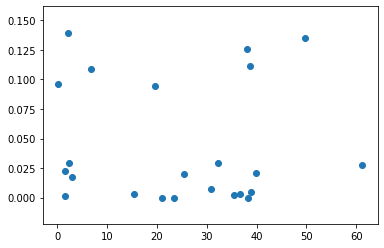

CD8 T cells :  0.06523196392892552


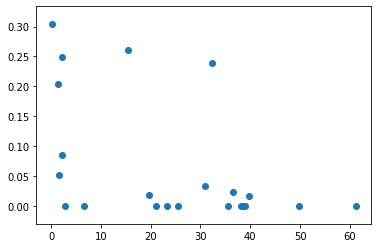

T cells gamma delta :  0.005525817856527762


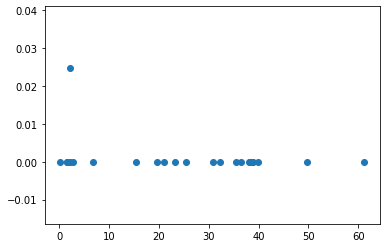

B cells :  0.05896114274206763


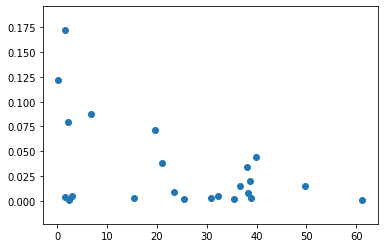

CD4 T cells :  0.09006593692118307


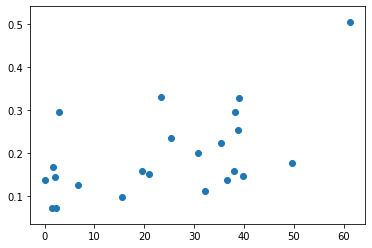

NK cells :  0.018784574550998686


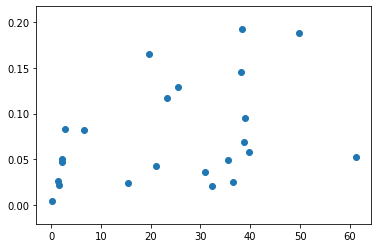

Macrophages :  0.00018562209760019627


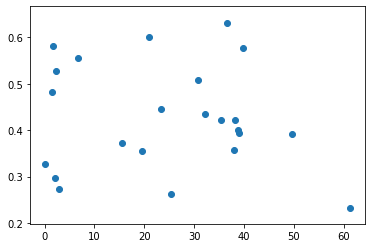

Mast cells :  0.0006301273497824332


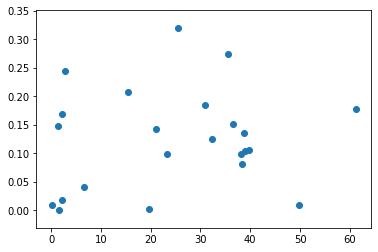

DC :  0.0004923448326387874


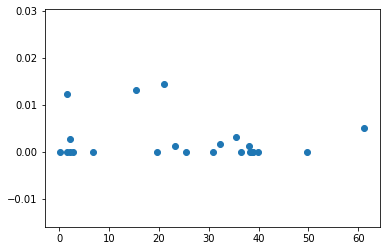

In [106]:
for i in list(group_1_df.columns):
    corr,x,y = immune_dss_corr(i,patient_dict_6,group_1_df)
    print(i,": ",corr)
    plt.scatter(x,y)
    plt.show()
    

## Check the correlation between other phenotypes

In [116]:
other_phenotypes = pd.read_csv("../data/TCGA-UVM.GDC_phenotype.tsv",delimiter="\t",index_col="submitter_id.samples")
other_phenotypes.head()

,age_at_initial_pathologic_diagnosis,batch_number,bcr,bcr_followup_barcode,bcr_followup_uuid,submitter_id,clinical_M,clinical_N,clinical_T,clinical_stage,...,days_to_collection.samples,days_to_sample_procurement.samples,initial_weight.samples,is_ffpe.samples,oct_embedded.samples,preservation_method.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
submitter_id.samples,,,,,,,,,,,,,,,,,,,,,
TCGA-V4-A9F7-01A,78,417.33.0,Nationwide Children's Hospital,TCGA-V4-A9F7-F66819,DE1CF63C-0469-4545-A095-BCA125977D94,TCGA-V4-A9F7,M0,N0,T3a,Stage IIB,...,747.0,NaN,50.0,False,False,NaN,Primary Tumor,1,released,Not Reported
TCGA-V4-A9E5-01A,51,417.33.0,Nationwide Children's Hospital,TCGA-V4-A9E5-F66658,C0DCBFC1-2F12-48AF-AF9C-498E1F89A1A4,TCGA-V4-A9E5,M0,N0,T4b,Stage IIIB,...,1923.0,NaN,80.0,False,False,NaN,Primary Tumor,1,released,Not Reported
TCGA-V4-A9EE-01A,86,417.33.0,Nationwide Children's Hospital,NaN,NaN,TCGA-V4-A9EE,M0,N0,T3a,Stage IIB,...,537.0,NaN,40.0,False,False,NaN,Primary Tumor,1,released,Not Reported
TCGA-YZ-A985-01A,41,417.33.0,Nationwide Children's Hospital,TCGA-YZ-A985-F66494,3ED3D1AA-1412-4225-B2BD-D1952057C31C,TCGA-YZ-A985,M0,N0,T4a,Stage IIIA,...,595.0,NaN,40.0,False,False,NaN,Primary Tumor,1,released,Not Reported
TCGA-VD-A8KF-01A,68,417.33.0,Nationwide Children's Hospital,NaN,NaN,TCGA-VD-A8KF,M0,N0,T4b,Stage IIIB,...,309.0,NaN,120.0,False,False,NaN,Primary Tumor,1,released,Not Reported


In [109]:
other_phenotypes.columns

Index(['submitter_id.samples', 'age_at_initial_pathologic_diagnosis',
       'batch_number', 'bcr', 'bcr_followup_barcode', 'bcr_followup_uuid',
       'submitter_id', 'clinical_M', 'clinical_N', 'clinical_T',
       ...
       'days_to_collection.samples', 'days_to_sample_procurement.samples',
       'initial_weight.samples', 'is_ffpe.samples', 'oct_embedded.samples',
       'preservation_method.samples', 'sample_type.samples',
       'sample_type_id.samples', 'state.samples', 'tissue_type.samples'],
      dtype='object', length=109)

1
2
3


{'whiskers': [<matplotlib.lines.Line2D at 0x205e4604ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x205e4609a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x205e4604748>,
 'medians': [<matplotlib.lines.Line2D at 0x205e4609bc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x205e460fa48>,
 'means': []}

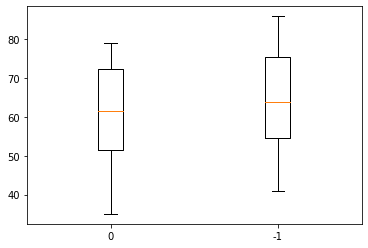

In [155]:
patient_dict_7 = {}
i = 0
for p in list(patient_data.index):
    if p+"-01A" in list(other_phenotypes.index) and not np.isnan(other_phenotypes.loc[p+"-01A","age_at_initial_pathologic_diagnosis"]):
        patient_dict_7[str(p)+"-01"] = (presence_df.loc["BAP1",str(p)+"-01"],other_phenotypes.loc[p+"-01A","age_at_initial_pathologic_diagnosis"])
    else:
        i +=1
        print(i)
neg1_group = [patient_dict_7[p][1] for p in list(patient_dict_7.keys()) if patient_dict_7[p][0] == -1]    
zero_group = [patient_dict_7[p][1] for p in list(patient_dict_7.keys()) if patient_dict_7[p][0] == 0]  

plt.boxplot([zero_group,neg1_group],labels=[0,-1])

In [158]:
mannwhitneyu(neg1_group,zero_group)

MannwhitneyuResult(statistic=640.5, pvalue=0.17779217079330206)

In [165]:
patient_dict_8 = {}
for p in list(patient_data.index):
    patient_dict_8[str(p)+"-01"] = (presence_df.loc["ATG14",str(p)+"-01"],patient_data.loc[p,"DSS_MONTHS"])

In [169]:
zero_group_2 = [patient_dict_8[p][1] for p in list(patient_dict_8.keys()) if patient_dict_8[p][0] == 0]
neg1_group_2 = [patient_dict_8[p][1] for p in list(patient_dict_8.keys()) if patient_dict_8[p][0] == 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x205e4c1d9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x205e4c1db88>,
 'boxes': [<matplotlib.lines.Line2D at 0x205e4c1d2c8>,
 'medians': [<matplotlib.lines.Line2D at 0x205e4c22fc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x205e4c22c08>,
 'means': []}

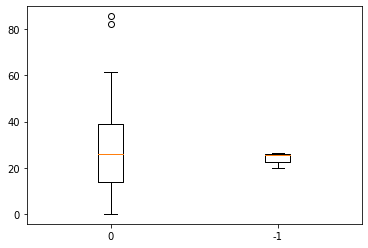

In [170]:
plt.boxplot([zero_group_2,neg1_group_2],labels=[0,-1])

In [171]:
mannwhitneyu(zero_group_2,neg1_group_2)

MannwhitneyuResult(statistic=103.0, pvalue=0.393841353434712)